In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [2]:
##Helper functions. Use when needed. 
def show_orignal_images(pixels):
	#Displaying Orignal Images
	fig, axes = plt.subplots(5, 20, figsize=(11, 7),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(np.array(pixels)[i].reshape(200, 200), cmap='gray')
	plt.show()

In [3]:
def show_eigenfaces(pca):
	#Displaying Eigenfaces
	fig, axes = plt.subplots(5,8, figsize=(9, 4),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(pca.components_[i].reshape(200, 200), cmap='gray')
	    ax.set_title("PC " + str(i+1))
	plt.show()

In [4]:
## Step 1: Read dataset and visualize it
df = pd.read_csv("C:/Users/Vishal/Desktop/new_data.csv")
target=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4]
df['target']=target

targets = df["target"]
pixels = df.drop(["target"],axis=1)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,39991,39992,39993,39994,39995,39996,39997,39998,39999,target
0,81,86,95,88,91,109,98,97,56,37,...,188,192,194,196,196,195,199,200,201,0
1,21,24,28,37,42,47,49,47,52,58,...,175,175,176,175,176,179,177,177,175,0
2,56,39,24,21,21,22,24,19,19,21,...,162,152,147,145,135,120,114,98,81,0
3,33,33,37,30,24,25,24,22,22,20,...,164,160,153,148,155,166,169,179,180,0
4,49,50,54,56,53,60,62,57,52,55,...,164,165,165,165,165,169,174,175,176,0


In [6]:
print(np.array(pixels).shape)



(100, 40000)


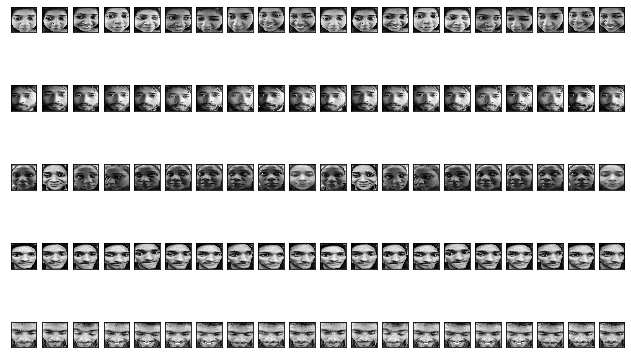

In [7]:
show_orignal_images(pixels)

In [8]:
## Step 2: Split Dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(pixels, targets,test_size=0.2)

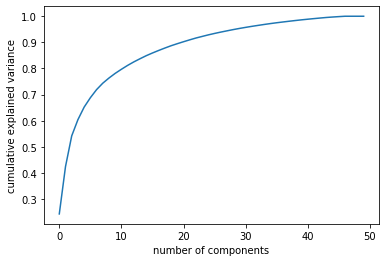

In [9]:
## Step 3: Perform PCA.
pca = PCA(n_components=50).fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

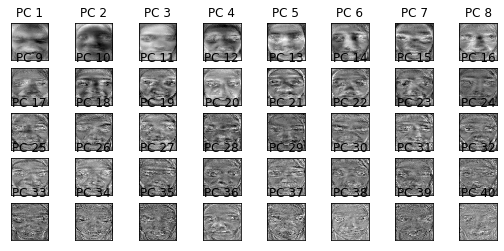

In [10]:

show_eigenfaces(pca)

In [11]:

## Step 4: Project Training data to PCA
print("Projecting the input data on the eigenfaces orthonormal basis")
Xtrain_pca = pca.transform(x_train)



Projecting the input data on the eigenfaces orthonormal basis


In [12]:
## Step 5: Initialize Classifer and fit training data
clf = SVC(kernel='rbf',C=1000,gamma=0.001)
clf = clf.fit(Xtrain_pca, y_train)


In [14]:
## Step 6: Perform testing and get classification report
print("Predicting people's names on the test set")

Xtest_pca = pca.transform(x_test)
y_pred = clf.predict(Xtest_pca)

print(classification_report(y_test, y_pred))

Predicting people's names on the test set
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      1.00      1.00         4
           2       1.00      0.50      0.67         4
           3       1.00      1.00      1.00         4
           4       0.43      1.00      0.60         3

    accuracy                           0.80        20
   macro avg       0.89      0.82      0.80        20
weighted avg       0.91      0.80      0.81        20

